In [10]:
from Bio import SeqIO, pairwise2
from Bio.SeqUtils import GC, molecular_weight as mw, MeltingTemp as mt, nt_search
from collections import Counter
from Levenshtein import distance
from matplotlib import pyplot as plt

In [5]:
record = SeqIO.read('c.fasta', 'fasta')
seqA = record.seq
print("length:", len(seqA))
print("complement:", seqA.complement())
print("transcribe:", seqA.transcribe())
print("translate:", seqA.translate())

length: 756
complement: GCGGATGTCANCCCAGCGCNCTNNAGNGCCNNANCGTNACGTAGGGTCNNNCAGCNCNGCNCNCGNGCACCACNNNNGTNNNNCTCANACTCNGAANCNATCNTAANNAGTGNCGCACTGGAGAGGAGACCCCGCCAGTGGATTTCTGCTNATGAATAGGCCTCCCGCAAAGGCTCCCACACAGACCAGAATTAACCACACTCGCCCCCCACGGACCATATAAACTATTTTAAAACCCCACCGCGACCCGCCGCATACCGNCCAGGTGCCGCAAAGAGAGCCCTAANACTACCGTAGCCCCATNGTGCTCAGGTTTCCGCCTTTNACGTTCCCACATCGAGCAAAGGCCAGATCACACCGCCGTAGTAACTCTGCCTTCCCCCCAGTAACGCCTCCCCGCCTANNGAGNANANAAAANANAATNCNGGGAGAGGGGGAGGGGGCGGGGGAGGGGTCCCTCTCGTTGTGAGGGGCGCCGTTCGGTTGACAAAGAGAAAAAGAATGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTGTTTAGGTTCTGTTGTGATGATTCCGAAGAAACCCTTCCCCTTCATCCCTATCCATTCTCCTTTCATTCCCTGGAGGATAGGTCGGAGGTACCTTAGGACTGAAGAAAAGGAACAATAAAGTTGAAGAAGGTGGGGTAGAAAATTTGAAATCTGAGGTCGGTGTCTTCGAATGTTGATTTTCTTTGAGATTCCGGTTAAATTAGGTTCCAA
transcribe: CGCCUACAGUNGGGUCGCGNGANNUCNCGGNNUNGCANUGCAUCCCAGNNNGUCGNGNCGNGNGCNCGUGGUGNNNNCANNNNGAGUNUGAGNCUUNGNUAGNAUUNNUCACNGCGUGACCUCUCCUCUGGGGCGGUCACCUAAAGACGANUACUUAUCCGGAGGGCGUUUCCGAGGGUGUGUCUGGUCUUAAUUGGUGUGAGCGGG

In [6]:
seqPart = seqA[4:40]
print("5 to 40:", seqPart)

5 to 40: TACAGTNGGGTCGCGNGANNTCNCGGNNTNGCANTG


In [7]:
nt_search(str(seqA), 'AATC')

['AATC', 547, 638, 745]

In [12]:
temp = [x for x in seqA if x in 'ATGC']
temp = ''.join(temp)
print("GC:", GC(temp))
print("AT:", 100 - GC(temp))


GC: 53.03244005641749
AT: 46.96755994358251


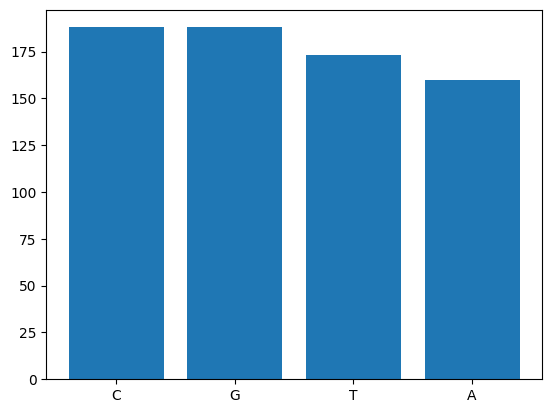

In [13]:
resCounter = Counter(seqA)
plt.bar(resCounter.keys(), resCounter.values())
plt.show()

In [14]:
print("wallace:", mt.Tm_Wallace(seqA))
print("GC:", mt.Tm_GC(seqA))
print("NN:", mt.Tm_NN(seqA))

wallace: 2170.0
GC: 80.55193034722053
NN: 83.70401250433599


In [15]:
print("molecular weight:", mw(seqA))

molecular weight: 219013.36649999942


In [17]:
seqB = "CGTAGCTAGCGACTAGTCGACAGCGATCGATGATATGCATGATGATGTATATAATGTGCAGTCGATGCTGATGCATTCTGGCGTCTGACGCTAGCTAGGCTAGCTAGCAGCTAGCTGATCGATGCGATGCTAGTACTGAGTCGACGATGCTAGCTA"
globalAlignms = pairwise2.align.globalms(seqA, seqB, 5, 2, -2, -1)
print(pairwise2.format_alignment(*globalAlignms[0]))

CGCCTACAGTGGGTCGCGGATCCGGTGCATGCATCCCAGGTCGGCGGGCCGTGGTGCAGAGTTGAGCTTGTAGATTTCACGCGTGACCTCTCCTCTGGGGCGGTCACCTAAAGACGATACTTATCCGGAGGGCGTTTCCGAGGGTGTGTCTGGTCTTAATTGGTGTGAGCGGGGGGTGCCTGGTATATTTGATAAAATTTTGGGGTGGCGCTGGGCGGCGTATGGCGGTCCACGGCGTTTCTCTCGGGATTTGATGGCATCGGGGTACACGAGTCCAAAGGCGGAAATGCAAGGGTGTAGCTCGTTTCCGGTCTAGTGTGGCGGCATCATTGAGACGGAAGGGGGGTCATTGCGGAGGGGCGGATCTCTTTTTTTTTAGCCCTCTCCCCCTCCCCCGCCCCCTCCCCAGGGAGAGCAACACTCCCCGCGGCAAGCCAACTGTTTCTCTTTTTCTTACACACACACACACACACACACACACACACACACACACACACACAAATCCAAGACAACACTACTAAGGCTTCTTTGGGAAGGGGAAGTAGGGATAGGTAAGAGGAAAGTAAGGGACCTCCTATCCAGCCTCCATGGAATCCTGACTTCTTTTCCTTGTTATTTCAACTTCTTCCACCCCATCTTTTAAACTTTAGACTCCAGCCACAGAAGCTTACAACTAAAAGAAACTCTAAGGCCAATTTAATCCAAGGTT
||  ||         ||   |                ||  ||.|      |       |||    |     ||   || ||  ||  ||                      ||.|||| |          ||       |   ||           |       |||            | ||||||       |||      || ||            |     |||                      ||| || | |                        ||||

In [18]:
def hamming(seq1, seq2):
    return len([(x,y) for x,y in zip(seq1, seq2) if x != y])

seqC = "AGCTGATCGTACGTAGGACGTAGTCGATATCTACATGAGCGCGGCGCATATATATATGCGATCGTAGCTGACGATCATCATCGTAGCTAGTCGATGCTAGCTGATCGCCCCCGGGGGGGGATATATTATATAGGTATAAAAAATGTGTGTTGGTTTTTTTTTTTTTTTTCAGTCGTAGCTGATCGATGCGATGCTAGTCGTAGCTGATCGATCGTAGCTGATCGTAACGACGTCCAGAGTTTTTTCTTTAGCAAACAGATTTATTACAAACGGTGAAAAATGCAGAGGCAACTTAAAGCCCATTCCAGTAAAAAACATTCAGGCTTTGGAGAATCGGAGAAAGTCCACCTGGATGTCAACCTGAAGAAACATTTGGAAAACTTGGAGTCAGTTTTCAGCTTTTTAAGCCCTTTATTTTTTGCCTCTTATTTGTATGTTTCTTTTCTCAACGAAAAATGTTTTAATTTTAGCACAATCAACGTAAACCTGACGGTCTAATTTCATCTGAGTGATAGCTAGAATTAGTGTGCCATTGGTTGTTTGTTTTCATTTTGTAGATTTACTACATTGAGTGTGCGAATGTGTCATGAATTTCGTTTAAAGTTTGCATATTCCAGTAGCAAATTAAATGTTTATAAAAAATAAGTTTTGTTTTGGATCTGAAGTGCATGATATTGCATATTGTTAATGAACTTACAGACTTCTTCTTGTGGCGTAGCGATCGTAGCTGATGCTGATCGATGCTAGTCGATGCGATCGTAGCTGATGCTAGCTGATCGTAGCTAGCTAGCTAGTCGTGTGCTGTCGTGTGTGATCATCGATGCTAGCGATCGAGCTAGCTGATCGAGCTAGTCGATCGTAGCTAGTCGATGCTAGCTGATCGTAGCTGATCGTATATTTATATATATGCGCTACTAGCTTGACGATCATGCTAGTGTGTGTCGTAGCTGATGCGCGCGCGTATATATATAATTTTTTTTAAAGTCGATGCCCCCCCCGGGGGAGATGTCAGCTGATCGATGCTAGGATATGCTGATCGTAGCTGACGATGCTGATGCTAGGGCGCCCGGGATTATATATTTTTAAAGGCTACGTACGGGCGCGCGGGGCGAGCTGAGGGGCGCGCGGTATATATTATAGCTGTAGCTAGCTGAGCTAGCTGGGGATAAAAAATTTTTTATGCTAGCTGATCGATGCATCGCGAGA"
print("hamming:", hamming(seqA, seqC))

hamming: 524


In [19]:
seqD = "TAGAGGCAATGTTATATGAGAATCCTCCAAATGTCCTCCGACATAAATAGCCGGCTCCACCTGTTTGCCTGCACCTGACGTAGCGCCAACTGTCCTCTACCATGGGGGGGCTGCATATCGCACAGCTGTGCGGGTAGAAACTCACATTCCATGGCGATTAGTCGCCGGTGCAGCACATGGGAGCTAATTCGGCATGTGCCCCCAAGCGGGCAGGATAAGGACGCAAGCAATAATGATTGAATGCATAGGACGATGCACACTCGGATGAAGTCTGTCACCTTGGTGCGTTGTATACTCACTCTTTGCCGTGCCGGCAAAATCGGTAAAGGAAGAAGGGTGGTAGCGTCGTTGGGAGGCTCGAAAGCATAAAGTATAGATGCCCTGTAGCACCGTATGCTAGACAGGTTCTAGAGCCCTACCTGTATGAAACCCTTGAACCGCTATCGAGCACGTGTCAAACCCCACCAGATCGTGGAATCCCGCGAGGCGTCATCTATGTACTGTGCTATATCCCCCTTGGCGACCCAGTGATGCCAGGGGCTTGCGTCAAACCAAGTTGGTAGTATCTATCGACATGATAGAATCCATCGTCTAGGATTACGTAAGCCGCAAGCACTCGATCAGGCGCTAGAGCCATTCACATATATATAAGCTCTCGATCTAAGAAGCGTCATCGATCCCTCTAGGATGCCAAGCTTGTGGTTGATCGACATATACAGCTATAAGTCAACGGGCCTTCCACCCGCGTTTTTCTCGCTAGTGATTGCCACACGAGTATACCAAGAGCAAGCATAAGCGTACCGTACCCCGCAGAACAGTAAAACTCCGGGCTCCGAA"
print("levenhstein:", distance(seqA, seqD))

levenhstein: 428
